# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points
 
7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

In [6]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

## <span style="color:black">*We only add required libraries in the code as those are the ones that serve a purpose to complete each task efficiently, while other libraries do not. Pandas is used for manipulating data and for analysis to ensure no missing data. NumPy performs mathematical functions that are essential for statistical calculations, such as matrices for finding statistics. Matplotlib is used to create plots for data visualization, with the added support of Seaborn to enhance the aesthetics of plots and make them more informative. Scikit-learn (sklearn) is used to train machine learning models, test their performance, calculate ROC curves, transform categorical variables into numerical values for preprocessing data, and evaluate models. By using these required libraries, it ensures that the code is efficient, optimized, and effective for fulfilling each purpose. It also allows for better readability, and without unnecessary libraries, there is no confusion or misunderstanding in the code. Furthermore, with multiple libraries certain varaiables that the user inputs could be confused as another funciton on the library taking up the namespace that can potentially disrupt the code as well.*</span>

## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [10]:
# READ DATA
data = pd.read_excel('/Users/emily/Test/Approval.xlsx')

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [12]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(690, 16)

In [13]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
data.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [14]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [15]:
# DESCRIPTIVE STATS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [16]:
# DESCRIPTIVE STATS
data.describe

<bound method NDFrame.describe of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     

## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [19]:
# CHECK FOR MISSING VALUES
missing = data.isnull().sum()

print(missing)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [20]:
# IMPUTE MISSING VALUES

# for numeric data using mean
numeric = data.select_dtypes(include=[np.number]).columns
data[numeric] = data[numeric].astype(float)
data[numeric] = data[numeric].fillna(data[numeric].mean())

In [21]:
# For non numeric data using mode
nonnumeric = data.select_dtypes(exclude=[np.number]).columns
data[nonnumeric] = data[nonnumeric].fillna(data[nonnumeric].mode())

In [22]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1.0,30.83,0.000,1.0,1.0,Industrials,White,1.250,1.0,1.0,1.0,0.0,ByBirth,202.0,0.0,1.0
1,0.0,58.67,4.460,1.0,1.0,Materials,Black,3.040,1.0,1.0,6.0,0.0,ByBirth,43.0,560.0,1.0
2,0.0,24.50,0.500,1.0,1.0,Materials,Black,1.500,1.0,0.0,0.0,0.0,ByBirth,280.0,824.0,1.0
3,1.0,27.83,1.540,1.0,1.0,Industrials,White,3.750,1.0,1.0,5.0,1.0,ByBirth,100.0,3.0,1.0
4,1.0,20.17,5.625,1.0,1.0,Industrials,White,1.710,1.0,0.0,0.0,0.0,ByOtherMeans,120.0,0.0,1.0
5,1.0,32.08,4.000,1.0,1.0,CommunicationServices,White,2.500,1.0,0.0,0.0,1.0,ByBirth,360.0,0.0,1.0
6,1.0,33.17,1.040,1.0,1.0,Transport,Black,6.500,1.0,0.0,0.0,1.0,ByBirth,164.0,31285.0,1.0
7,0.0,22.92,11.585,1.0,1.0,InformationTechnology,White,0.040,1.0,0.0,0.0,0.0,ByBirth,80.0,1349.0,1.0
8,1.0,54.42,0.500,0.0,0.0,Financials,Black,3.960,1.0,0.0,0.0,0.0,ByBirth,180.0,314.0,1.0
9,1.0,42.50,4.915,0.0,0.0,Industrials,White,3.165,1.0,0.0,0.0,1.0,ByBirth,52.0,1442.0,1.0


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

## <span style="color:black">*A2. There does not seem to be any missing data.*</span>

## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

## <span style="color:black">*A3. Imputing mean for numeric data seems to be a better choice since numeric data is usually normally distributed and then the mean gives a sensible representation of the value. Imputing the mode will be best for non-numeric data since we will be imputing the most common category for a missing value.*</span>

## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [28]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# INSTANTIATE LABELENCODER
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# USE LABEL ENCODER le TO TRANSFORM VARIABLES

# Create a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()

# Iterate through each column in the original DataFrame
for column in data.columns:
    if data[column].dtype == 'object':
        # One-hot encode the column if it's of object type (string)
        transformed_data = ohe.fit_transform(data[[column]])
        ohe_columns = ohe.get_feature_names_out([column])
        transformed_df = pd.DataFrame(transformed_data, columns=ohe_columns)
        data_transformed = pd.concat([data_transformed, transformed_df], axis=1)
    else:
        # If not object type, just copy the data to the transformed DataFrame
        data_transformed[column] = data[column]
        
# Replace the original data with the transformed DataFrame
data = data_transformed

# Display the transformed DataFrame
print(data.head(10))

   Gender    Age    Debt  Married  BankCustomer  \
0     1.0  30.83   0.000      1.0           1.0   
1     0.0  58.67   4.460      1.0           1.0   
2     0.0  24.50   0.500      1.0           1.0   
3     1.0  27.83   1.540      1.0           1.0   
4     1.0  20.17   5.625      1.0           1.0   
5     1.0  32.08   4.000      1.0           1.0   
6     1.0  33.17   1.040      1.0           1.0   
7     0.0  22.92  11.585      1.0           1.0   
8     1.0  54.42   0.500      0.0           0.0   
9     1.0  42.50   4.915      0.0           0.0   

   Industry_CommunicationServices  Industry_ConsumerDiscretionary  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
5                       

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

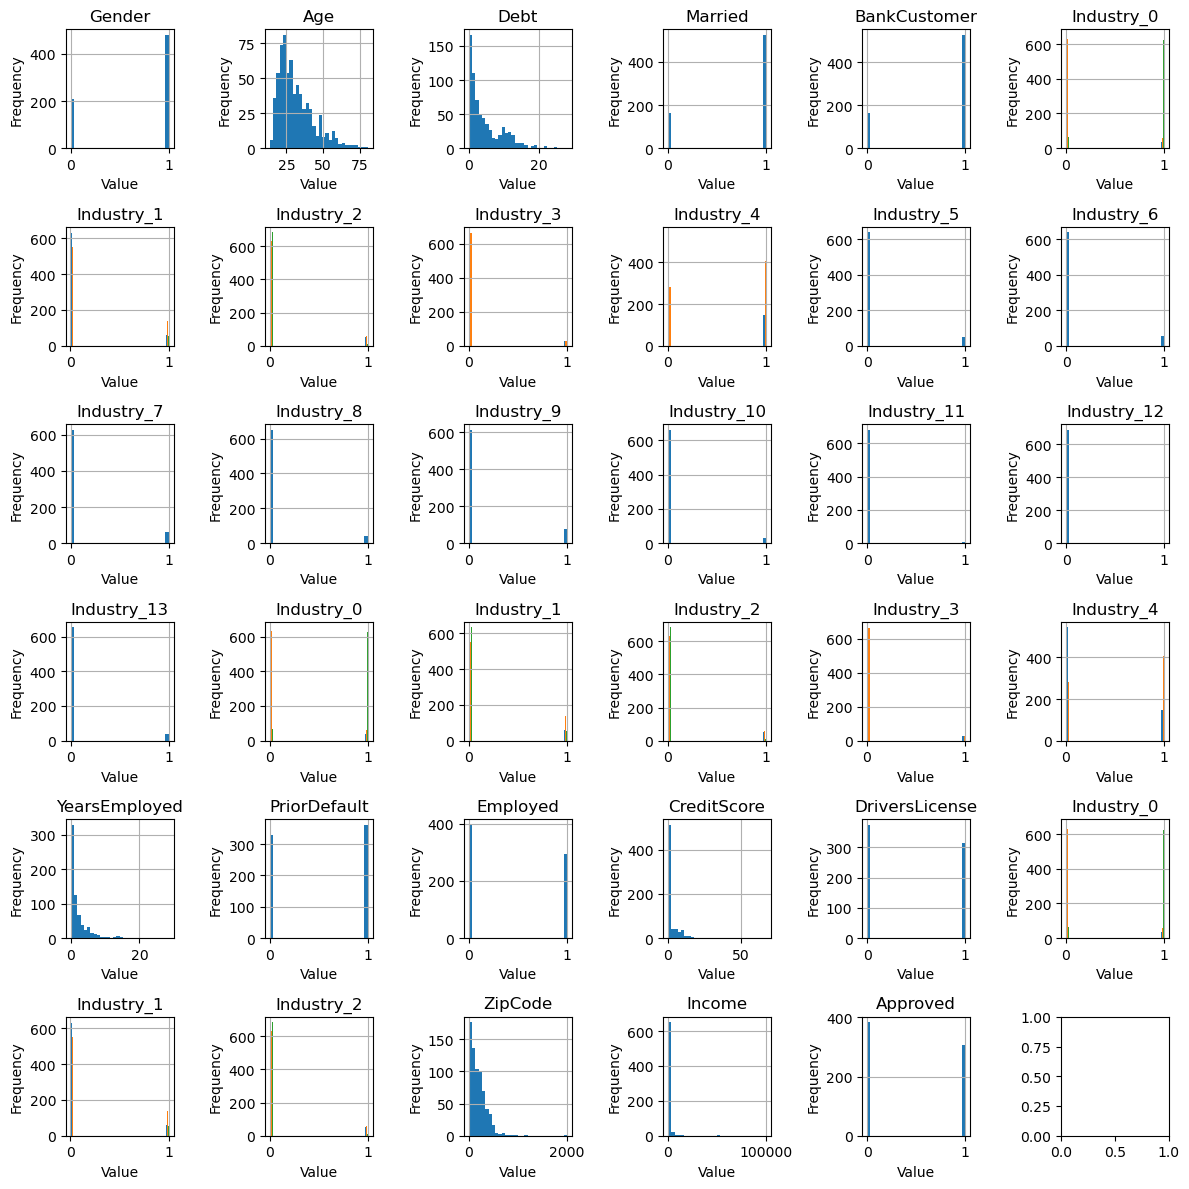

In [29]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, column in enumerate(data.columns):
    # Plot histogram for each column on respective subplot
    axes[i].hist(data[column], bins=30)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

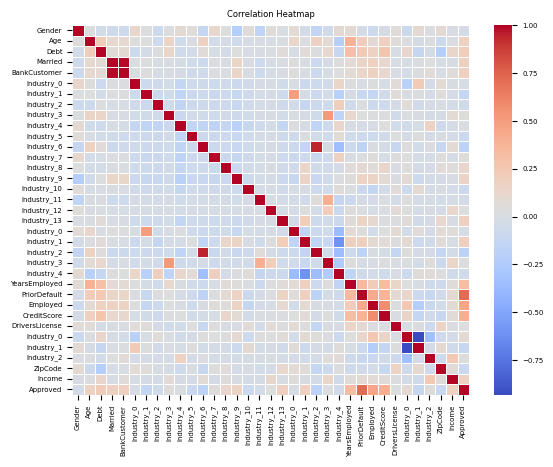

In [30]:
# CALCULATE THE CORRELATION MATRIX
correlation = data.corr()

# Decrease font size
plt.rcParams['font.size'] = 5

# PLOT THE HEATMAP
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

## <span style="color:black">*A4. The histograms of the categorical variables have been divided into sub variables where their values are either 1 or 0 indicating their prescence (1) or absence (0). The histograms of the variables on the other hand seem to have actual numerical values on the x-axis suggesting that they consist of numerical data.*</span>

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

## <span style="color:black">*A5. The heatmap and correlation matrix suggest that there is no strong correlation but several moderate correlations. Moreover, we can clearly also see that that most of the variables have correlation close to 0 which means that they are mostly indepenedent and not heavily influenced by other variables. The fact that the variables have a higher correlation matrix reading that the sub-variables show that they had been distinctly grouped, which also makes a lot of sense.*</span>

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [36]:
# DROP THE VARIABLES NOT NEEDED

# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
X = data.drop(columns = ['Approved'])
y = data['Approved']

# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [37]:
print(X.head())

   Gender    Age   Debt  Married  BankCustomer  Industry_0  Industry_1  \
0     1.0  30.83  0.000      1.0           1.0         0.0         0.0   
1     0.0  58.67  4.460      1.0           1.0         0.0         0.0   
2     0.0  24.50  0.500      1.0           1.0         0.0         0.0   
3     1.0  27.83  1.540      1.0           1.0         0.0         0.0   
4     1.0  20.17  5.625      1.0           1.0         0.0         0.0   

   Industry_2  Industry_3  Industry_4  ...  YearsEmployed  PriorDefault  \
0         0.0         0.0         0.0  ...           1.25           1.0   
1         0.0         0.0         0.0  ...           3.04           1.0   
2         0.0         0.0         0.0  ...           1.50           1.0   
3         0.0         0.0         0.0  ...           3.75           1.0   
4         0.0         0.0         0.0  ...           1.71           1.0   

   Employed  CreditScore  DriversLicense  Industry_0  Industry_1  Industry_2  \
0       1.0          1.0

**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [39]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
# <Your code here>

# FIT MODEL TO THE TRAIN SET
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [40]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

## <span style="color:black">A6: *Part of the data is splitted into the 'training' set which will be used for generating a model that can predict our outcome. The rest of the data will be used to test the accuracy of the model so we know if the modeling is successful.*</span>

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = model.score(X_test_scaled, y_test)
print("Accuracy of logistic regression classifier: ", accuracy)

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy of logistic regression classifier:  0.855072463768116
Confusion Matrix: 
[[101  17]
 [ 13  76]]


In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.855072463768116
Precision: 0.8172043010752689
Recall: 0.8539325842696629


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


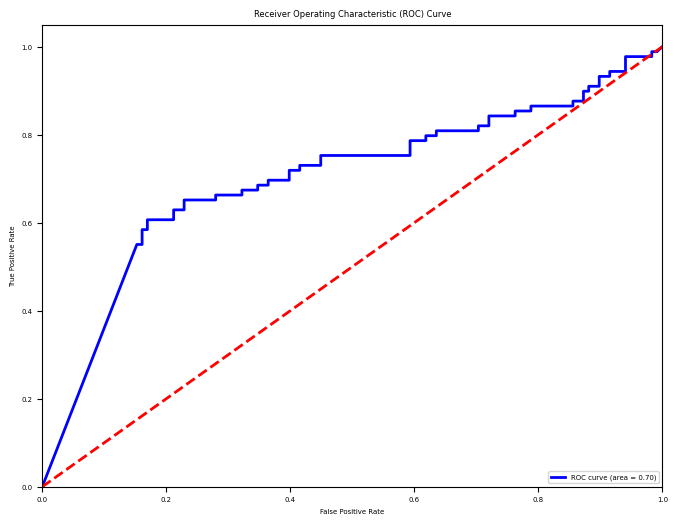

In [47]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
# Predict probabilities for positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# method to plot ROC Curve
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 5
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()